In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from layers.basic_layers import LinearLayer
from layers.activation_layers import TanhLayer, SigmoidLayer, ReluLayer, BatchNormLayer
from layers.vae_layers import CVAEConstructorLayer
from sequentials.vaegansequential import VariationalAutoencoder, Encoder, Decoder, ConditionalGAN, VAEGAN
from sequentials.basic_sequential import Sequential
from utils.losses import MSE, BCE
from utils.analysis_tools import generate_digit
from utils.utils import load_base

In [2]:
def generate_digits(model, label):
    plt.figure(figsize=(15, 3))
    for digit in range(10):
        img = generate_digit(model, digit)
        plt.subplot(1, 10, digit + 1)
        plt.imshow(img, cmap="gray")
        plt.title(digit)
        plt.axis("off")

    plt.suptitle(label)
    plt.show()


def generate_digits_laptop(model, label):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_axis_off()

    # Laptop body and screen
    body = patches.FancyBboxPatch(
        (0.05, 0.05),
        0.9,
        0.55,
        boxstyle="round,pad=0.01,rounding_size=0.02",
        linewidth=1.5,
        edgecolor="#333333",
        facecolor="#bfbfbf",
    )
    screen = patches.FancyBboxPatch(
        (0.1, 0.62),
        0.8,
        0.3,
        boxstyle="round,pad=0.01,rounding_size=0.02",
        linewidth=1.5,
        edgecolor="#333333",
        facecolor="#1c1c1c",
    )
    ax.add_patch(body)
    ax.add_patch(screen)

    ax.text(
        0.5,
        0.94,
        label,
        ha="center",
        va="center",
        fontsize=14,
        color="#f0f0f0",
    )

    # Keyboard area with built-in cells
    key_area_x, key_area_y = 0.12, 0.12
    key_area_w, key_area_h = 0.76, 0.34
    cols, rows = 5, 2
    key_pad = 0.01
    key_w = key_area_w / cols
    key_h = key_area_h / rows

    for idx in range(10):
        row = idx // cols
        col = idx % cols
        x = key_area_x + col * key_w
        y = key_area_y + (rows - 1 - row) * key_h

        rect = patches.FancyBboxPatch(
            (x + key_pad, y + key_pad),
            key_w - 2 * key_pad,
            key_h - 2 * key_pad,
            boxstyle="round,pad=0.003,rounding_size=0.01",
            linewidth=1,
            edgecolor="#444444",
            facecolor="#dcdcdc",
        )
        ax.add_patch(rect)

        img = generate_digit(model, idx)
        key_ax = fig.add_axes(
            [
                x + key_pad * 1.5,
                y + key_pad * 1.5,
                key_w - 3 * key_pad,
                key_h - 3 * key_pad,
            ]
        )
        key_ax.imshow(img, cmap="gray")
        key_ax.set_axis_off()

    plt.show()

In [3]:
base_dir = os.path.abspath(os.getcwd())
if os.path.basename(base_dir) != "VAEGAN":
    candidate = os.path.join(base_dir, "VAEGAN")
    if os.path.isdir(candidate):
        base_dir = candidate

mnist_dir = os.path.join(base_dir, "mnist_data")

if not os.path.isdir(mnist_dir):
    raise FileNotFoundError(f"MNIST directory not found: {mnist_dir}")

cwd = os.getcwd()
try:
    os.chdir(mnist_dir)
    train_x, train_y, train_y_oh, test_x, test_y, test_y_oh, train_x_cond, test_x_cond = load_base(sample_size=10000)
finally:
    os.chdir(cwd)


epoches = 27
lr = 0.0035

VAE:   4%|▎         | 1/27 [00:02<00:59,  2.28s/epoch]

Epoch 0: Loss = 0.012766


VAE:   7%|▋         | 2/27 [00:04<00:49,  1.99s/epoch]

Epoch 1: Loss = 0.000112


VAE:  11%|█         | 3/27 [00:05<00:43,  1.82s/epoch]

Epoch 2: Loss = 0.000068


VAE:  15%|█▍        | 4/27 [00:07<00:40,  1.77s/epoch]

Epoch 3: Loss = 0.000051


VAE:  19%|█▊        | 5/27 [00:09<00:37,  1.72s/epoch]

Epoch 4: Loss = 0.000043


VAE:  22%|██▏       | 6/27 [00:10<00:35,  1.68s/epoch]

Epoch 5: Loss = 0.000038


VAE:  26%|██▌       | 7/27 [00:12<00:33,  1.66s/epoch]

Epoch 6: Loss = 0.000036


VAE:  30%|██▉       | 8/27 [00:13<00:31,  1.64s/epoch]

Epoch 7: Loss = 0.000035


VAE:  33%|███▎      | 9/27 [00:15<00:29,  1.63s/epoch]

Epoch 8: Loss = 0.000034


VAE:  37%|███▋      | 10/27 [00:17<00:27,  1.64s/epoch]

Epoch 9: Loss = 0.000034


VAE:  41%|████      | 11/27 [00:18<00:26,  1.63s/epoch]

Epoch 10: Loss = 0.000034


VAE:  44%|████▍     | 12/27 [00:20<00:24,  1.63s/epoch]

Epoch 11: Loss = 0.000034


VAE:  48%|████▊     | 13/27 [00:22<00:23,  1.64s/epoch]

Epoch 12: Loss = 0.000034


VAE:  52%|█████▏    | 14/27 [00:23<00:21,  1.64s/epoch]

Epoch 13: Loss = 0.000034


VAE:  56%|█████▌    | 15/27 [00:25<00:19,  1.63s/epoch]

Epoch 14: Loss = 0.000033


VAE:  59%|█████▉    | 16/27 [00:26<00:17,  1.62s/epoch]

Epoch 15: Loss = 0.000033


VAE:  63%|██████▎   | 17/27 [00:28<00:16,  1.62s/epoch]

Epoch 16: Loss = 0.000033


VAE:  67%|██████▋   | 18/27 [00:30<00:14,  1.65s/epoch]

Epoch 17: Loss = 0.000033


VAE:  70%|███████   | 19/27 [00:31<00:13,  1.64s/epoch]

Epoch 18: Loss = 0.000033


VAE:  74%|███████▍  | 20/27 [00:33<00:11,  1.68s/epoch]

Epoch 19: Loss = 0.000033


VAE:  78%|███████▊  | 21/27 [00:35<00:09,  1.67s/epoch]

Epoch 20: Loss = 0.000033


VAE:  81%|████████▏ | 22/27 [00:36<00:08,  1.66s/epoch]

Epoch 21: Loss = 0.000033


VAE:  85%|████████▌ | 23/27 [00:38<00:06,  1.67s/epoch]

Epoch 22: Loss = 0.000032


VAE:  89%|████████▉ | 24/27 [00:40<00:05,  1.67s/epoch]

Epoch 23: Loss = 0.000032


VAE:  93%|█████████▎| 25/27 [00:41<00:03,  1.65s/epoch]

Epoch 24: Loss = 0.000032


VAE:  96%|█████████▋| 26/27 [00:43<00:01,  1.62s/epoch]

Epoch 25: Loss = 0.000032


VAE: 100%|██████████| 27/27 [00:44<00:00,  1.67s/epoch]

Epoch 26: Loss = 0.000032


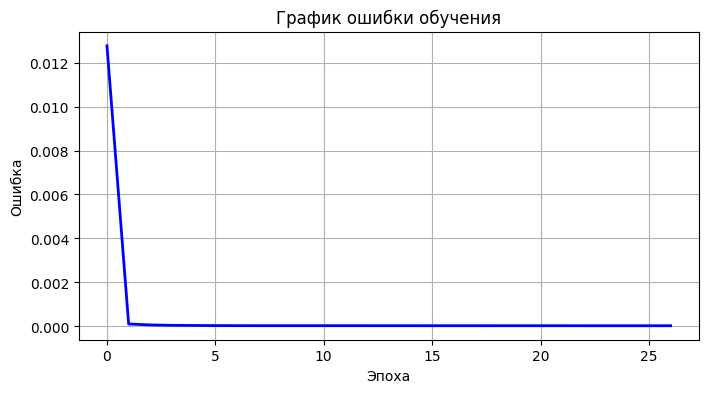

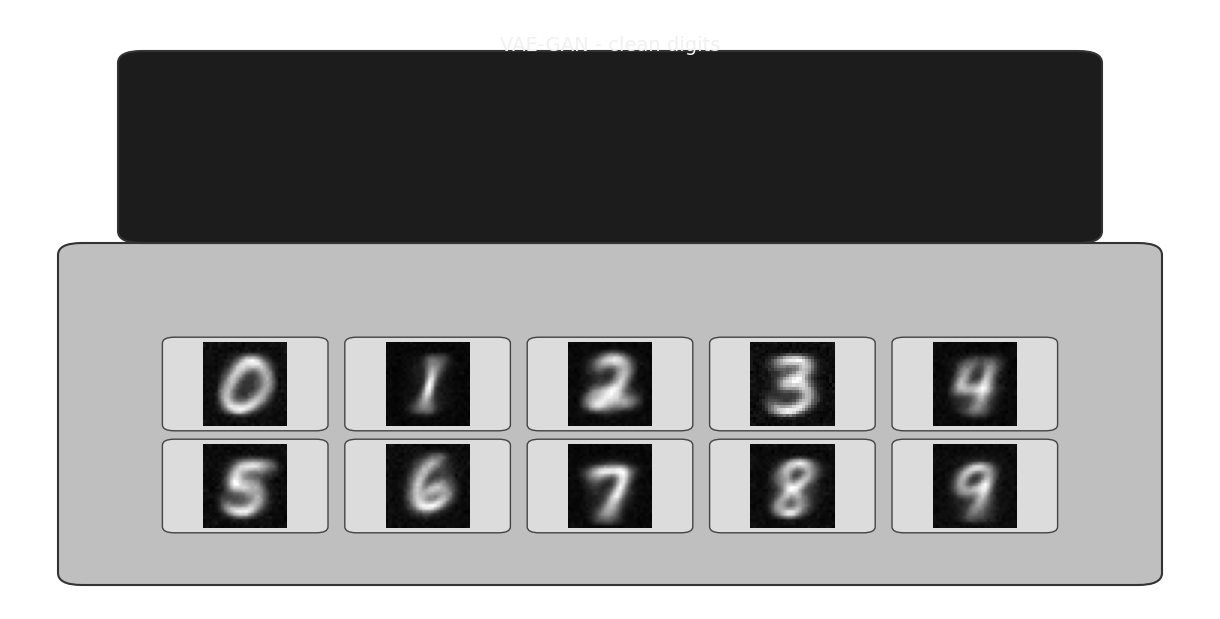

VAEGAN:  20%|██        | 1/5 [00:04<00:19,  4.80s/epoch]

Epoch   1 | Recon: 0.14856 | GAN_G: 0.65893 | GAN_D: 0.59275


VAEGAN:  40%|████      | 2/5 [00:09<00:14,  4.84s/epoch]

Epoch   2 | Recon: 0.14850 | GAN_G: 0.66906 | GAN_D: 0.57428


VAEGAN:  60%|██████    | 3/5 [00:14<00:09,  4.82s/epoch]

Epoch   3 | Recon: 0.14899 | GAN_G: 0.66741 | GAN_D: 0.57560


VAEGAN:  80%|████████  | 4/5 [00:19<00:04,  4.83s/epoch]

Epoch   4 | Recon: 0.14913 | GAN_G: 0.65711 | GAN_D: 0.58441


VAEGAN: 100%|██████████| 5/5 [00:24<00:00,  4.89s/epoch]

Epoch   5 | Recon: 0.14884 | GAN_G: 0.63844 | GAN_D: 0.60074


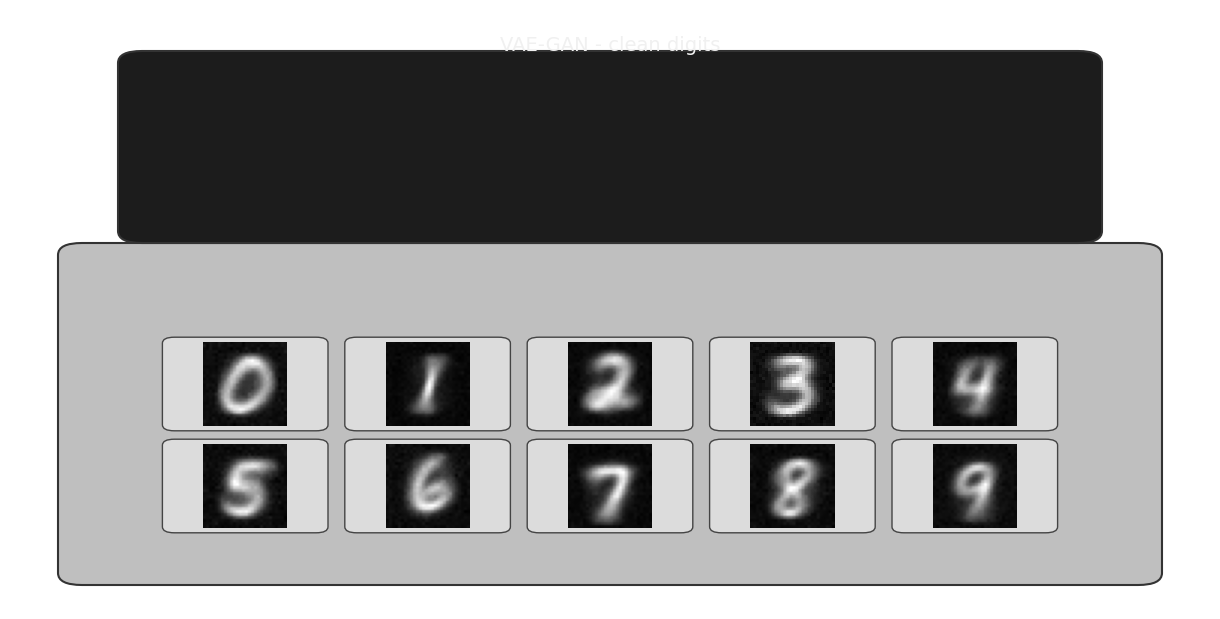

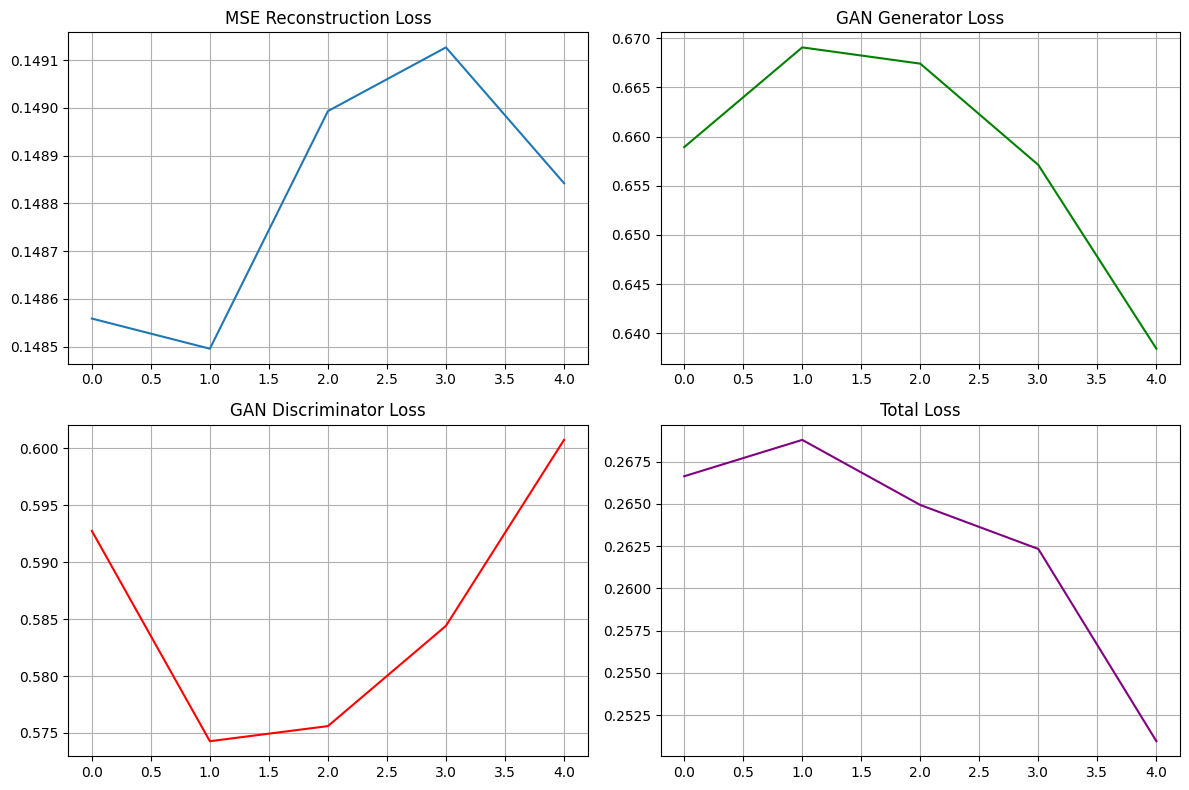

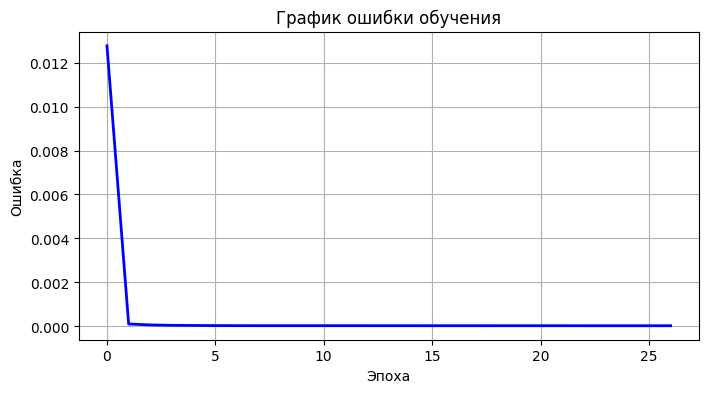

=== Metrics ===
Последняя ошибка: 0.000032
Средняя ошибка: 0.000510


In [4]:
encoder = Encoder(
    LinearLayer(784, 312),
    # LinearLayer(512, 256), ReluLayer(), BatchNormLayer(312)
    ReluLayer(),
    LinearLayer(312, 256), TanhLayer(),
    CVAEConstructorLayer(256 + 10, 64),
)

decoder = Decoder(
    LinearLayer(64 + 10, 312),
    TanhLayer(),
    # LinearLayer(256, 512), TanhLayer(), BatchNormLayer(312)
    LinearLayer(312, 784), SigmoidLayer(),
)

vae = VariationalAutoencoder(
    encoder=encoder,
    decoder=decoder,
    loss=MSE(),
)

discriminator = Sequential(
    LinearLayer(784, 406), ReluLayer(),
    LinearLayer(406, 124), ReluLayer(),
    LinearLayer(124, 1), SigmoidLayer(),
    loss=BCE(),
)

# === VAE pretraining (required for clean digits) ===
pretrained_path = os.path.join(base_dir, "models2")
if os.path.isfile(pretrained_path):
    # Use existing weights if present
    vae.load(pretrained_path)
else:
    # Train from scratch if no weights are available
    vae.fit(
        train_x, train_x,
        train_cond=train_y_oh * 300,
        epochs=epoches,
        lr=lr,
        batch_size=64
    )
    vae.show_plots()
    # Uncomment to persist weights for later runs
    # vae.save(pretrained_path)

vae.toggle_encoder(False)

generate_digits_laptop(vae, label="VAE-GAN - clean digits")


discriminator = Sequential(
    LinearLayer(784, 512), TanhLayer(),
    LinearLayer(512, 256), TanhLayer(),
    LinearLayer(256, 128), TanhLayer(),
    LinearLayer(128, 1), SigmoidLayer(),
    loss=BCE(),
)

vaegan = VAEGAN(
    vae=vae,
    discriminator=discriminator,
    latent_dim=64,
    num_classes=10,
)

vaegan.fit(
    train_x=train_x,
    train_cond=train_y_oh,
    epochs=5,
    batch_size=64,
    lr_d=0.004,
    lr_g=0.000002,
    vae_weight=0.005,
    gan_weight=0.4,
    d_updates_per_step=2,
    d_steps_before=5,
)

generate_digits_laptop(vae, label="VAE-GAN - clean digits")
vaegan.show_plots()

# #generate_digits(vae, label="Generated digits CVAE")
# latent_dim = 32  # size of latent vector from CVAE
# num_classes = train_y_oh.shape[1]  # number of classes, e.g. 10
#
# cgan = ConditionalGAN(
#     generator=vae.decoder,
#     discriminator=discriminator,
#     loss=BCE(),
#     latent_dim=latent_dim,
#     num_classes=num_classes
# )
#
# # Conditional GAN training
# cgan.fit(train_x, train_y_oh * 200, epochs=50, batch_size=64, lr=0.0002, num_of_learn_gen=10)
#
# generate_digits(vae, label="Generated digits VAE-GAN")

# === Display ===
vae.show_plots()
vae.show_metrics()